<a href="https://colab.research.google.com/github/subaruosawa/network-analyze/blob/main/challenge_other_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
pip install japanize-matplotlib

In [40]:
import json
import datetime
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
from community import community_louvain
import community
import itertools

In [3]:
with open("/content/drive/My Drive/jaccard_fin.json") as f:
  jaccard = json.load(f)
with open("/content/drive/My Drive/flow_fin.json") as f:
  flow = json.load(f)
with open("/content/drive/My Drive/aId_3rd_finset.json") as f:
  aId = json.load(f)
with open("/content/drive/My Drive/mean.json") as f:
  mean = json.load(f)
with open("/content/drive/My Drive/entry.json") as f:
  entry = json.load(f)
with open("/content/drive/My Drive/liver_sex.json") as f:
  sex = json.load(f)
with open("/content/drive/My Drive/liver_debut.json") as f:
  debut_str = json.load(f)
with open("/content/drive/My Drive/real_name.json") as f:
  real_name = json.load(f)

In [4]:
debut = []
for i in debut_str:
  debut.append(datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9))).date()
   - datetime.datetime.strptime(i,'%Y-%m-%d').date())

In [22]:
pair = list(itertools.combinations(real_name,2))

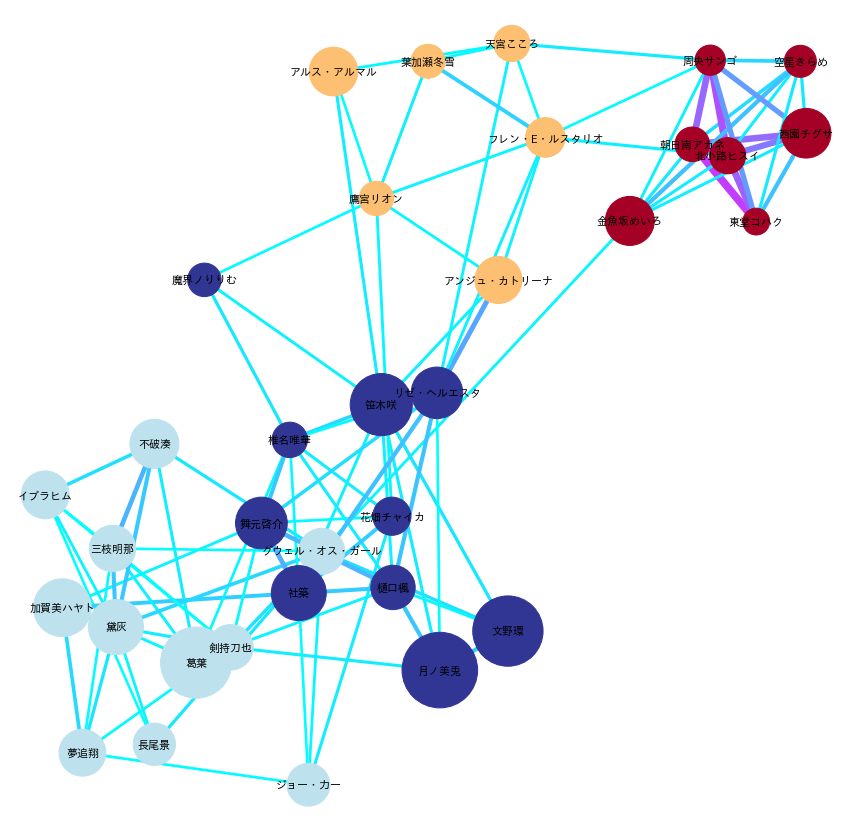

In [28]:
G = nx.Graph()

for i in range(106):
  G.add_node(real_name[i],
             count = len(aId[i]),
             sex = sex[i],
             debut = debut[i],
             name = real_name[i])


for e,i in enumerate(pair):
  G.add_edge(i[0],i[1],weight = jaccard[3][e])

for u,v,d in list(G.edges(data=True)):
  if d["weight"] <= 0.026:
    G.remove_edge(u,v)

for name,deg in list(G.degree):
  if deg <= 3:
    G.remove_node(name)

################################################################################
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.2)
deg = nx.degree_centrality(G).values()
partition=community.best_partition(G)
nx.draw_networkx(G, pos, with_labels=True,font_family="IPAexGothic",font_size=11)
cliques = nx.find_cliques(G)

node_size = [ d["count"]**1.1 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=node_size,
                       #node_color=list(deg),
                       node_color=list(partition.values()),
                       cmap=plt.cm.RdYlBu
                       )  
edge_width = [ d['weight']*100 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edge_color=edge_width, width=edge_width, edge_cmap=plt.cm.cool)

plt.axis('off')
plt.show()

In [29]:
print("クラスター数:"+str(max(partition.values())+1))
print("各ライバーの所属クラスター:"+str(partition))

クラスター数:4
各ライバーの所属クラスター:{'朝日南アカネ': 0, '天宮こころ': 1, 'アルス・アルマル': 1, 'アンジュ・カトリーナ': 1, 'イブラヒム': 2, '加賀美ハヤト': 2, '北小路ヒスイ': 0, '金魚坂めいろ': 0, '葛葉': 2, 'グウェル・オス・ガール': 2, '剣持刀也': 2, '三枝明那': 2, '笹木咲': 3, '椎名唯華': 3, 'ジョー・力一': 2, '周央サンゴ': 0, '空星きらめ': 0, '鷹宮リオン': 1, '月ノ美兎': 3, '東堂コハク': 0, '長尾景': 2, '西園チグサ': 0, '葉加瀬冬雪': 1, '花畑チャイカ': 3, '樋口楓': 3, '文野環': 3, 'フレン・E・ルスタリオ': 1, '不破湊': 2, '舞元啓介': 3, '魔界ノりりむ': 3, '黛灰': 2, '社築': 3, '夢追翔': 2, 'リゼ・ヘルエスタ': 3}


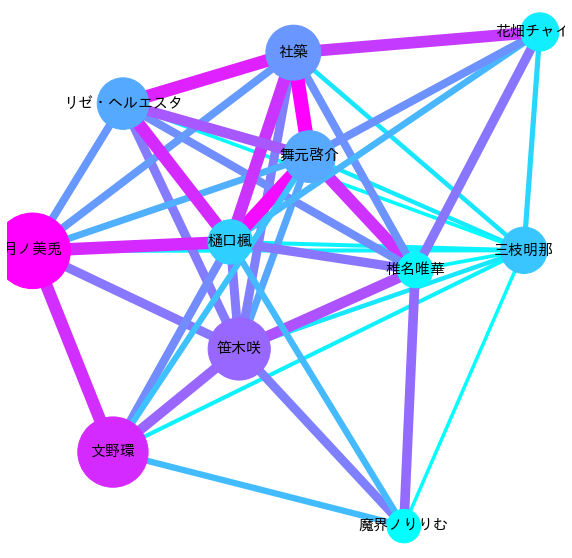

In [68]:
input = "三枝明那"
G2 = nx.Graph()

for i in range(106):
  G2.add_node(real_name[i],
             count = len(aId[i]),
             sex = sex[i],
             debut = debut[i],
             name = real_name[i])
  
for e,i in enumerate(pair):
  G2.add_edge(i[0],i[1],weight = jaccard[3][e])

cluster_n = []
for k,v in partition.items():
  if v == 3:#クラスターの数字
    cluster_n.append(k)
for u,v in list(G2.edges):
  if not u in cluster_n:
    G2.remove_edge(u,v)
  elif not v in cluster_n:
    G2.remove_edge(u,v)

for u,v,d in list(G2.edges(data=True)):
  if d["weight"] <= 0.02:
    G2.remove_edge(u,v)

order = real_name.index(input)
G2.add_node(real_name[order],
            count = len(aId[order]),
            sex = sex[order],
            debut = debut[order],
            name = real_name[order])

for e,i in enumerate(pair):
  if i[0] == input:
    if i[1] in cluster_n:
      G2.add_edge(i[0],i[1],weight = jaccard[3][e])
  elif i[1] == input:
    if i[0] in cluster_n:
      G2.add_edge(i[0],i[1],weight = jaccard[3][e])



for name,deg in list(G2.degree):
  if deg <= 1:
    G2.remove_node(name)

################################################################################
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G2, k=0.2)
deg = nx.degree_centrality(G2).values()
nx.draw_networkx(G2, pos, with_labels=True,font_family="IPAexGothic",font_size=15)

node_size = [ d["count"]**1.1 for (n,d) in G2.nodes(data=True)]
nx.draw_networkx_nodes(G2, pos, node_size=node_size, node_color=node_size, cmap=plt.cm.cool)
edge_width = [ d['weight']*300 for (u,v,d) in G2.edges(data=True)]
nx.draw_networkx_edges(G2, pos, edge_color=edge_width, width=edge_width, edge_cmap=plt.cm.cool)

plt.axis('off')
plt.show()